# Iris  Project



In [12]:
# import packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# stablize output across runs
np.random.seed(0)

## Dataset

This project uses the well known Iris dataset to classify the flowers into three subspecies: iris setosa, iris virginica and iris versicolor. It has four  features, including:
- Sepal.Length: sepal length in centimeters.
- Sepal.Width: sepal width in centimeters.
- Petal.Length: petal length in centimeters.
- Petal.Width: petal width in centimeters.

In [63]:
# load the iris train and test data from CSV files
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/iris_test.csv')

'''
This dataset was made by my professor, but comes from the Iris Dataset.
It can also be imported through sklearn and divided using a 67% training and 33% test split.

from sklearn import datasets
data = datasets.load_iris()
'''

train_x = train.iloc[:,0:4]
train_y = train.iloc[:,4]

test_x = test.iloc[:,0:4]
test_y = test.iloc[:,4]

# print the number of instances in each class
print('Train Data\n\n'+ str(train_y.value_counts().sort_index()))
print('\n\nTest Data\n\n' + str(test_y.value_counts().sort_index()))

Train Data

Iris-setosa        34
Iris-versicolor    32
Iris-virginica     39
Name: species, dtype: int64


Test Data

Iris-setosa        16
Iris-versicolor    18
Iris-virginica     11
Name: species, dtype: int64


### Decision Tree Classifier

#### Training and visualizing a basic DTC

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best') 



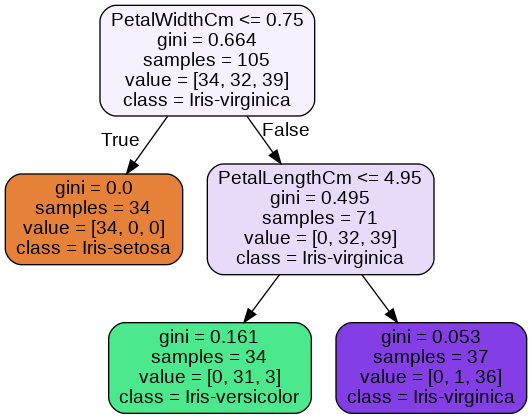

In [69]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Making simple DTC to get an idea of the data
dtc = DecisionTreeClassifier(max_depth=2)
print(dtc.fit(train_x, train_y),"\n")

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique()
class_names.sort()
export_graphviz(dtc, out_file=dot_data, feature_names=feature_names,
                class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#### Evaulating performance

In [16]:
# Examing the performance of the DTC
test_z = dtc.predict(test_x)

print("model accuracy: {}".format(round(accuracy_score(test_y, test_z),4)))
print("\n\nmodel confusion matrix:\n {}".format(confusion_matrix(test_y, test_z,
      labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])))
print("\n\nclassification report:\n {}".format(classification_report(test_y, test_z,
      labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])))

model accuracy: 0.9111


model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  3  8]]


classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.85      0.94      0.89        18
 Iris-virginica       0.89      0.73      0.80        11

       accuracy                           0.91        45
      macro avg       0.91      0.89      0.90        45
   weighted avg       0.91      0.91      0.91        45



#### Exploring Hyper-parameters

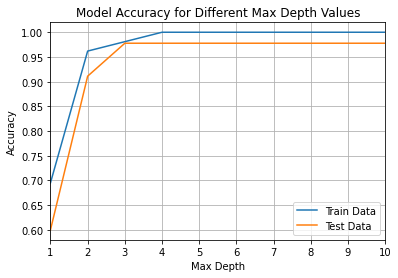

In [45]:
# Evaluated performance of DT model by changing max_depth

# However, there were only 3 features, so max_depth was value between 1 and 3. 

max_depth = range(1,11)
train_accuracy = []
test_accuracy = []
for x in max_depth:
   dtc = DecisionTreeClassifier(max_depth=x)
   dtc.fit(train_x, train_y)
   test_z = dtc.predict(test_x)
   train_z = dtc.predict(train_x)
   train_accuracy.append(accuracy_score(train_y,train_z))
   test_accuracy.append(accuracy_score(test_y,test_z))

plt.plot(max_depth,train_accuracy, label='Train Data')
plt.plot(max_depth,test_accuracy, label='Test Data')
plt.title('Model Accuracy for Different Max Depth Values')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.xlim(left=1, right=10)
plt.grid()

#### Examing the DTC in greater detail

Used GridSearchCV to change hyper-parameters

In [42]:
# Created function for reporting results

def reporting(x):
  print("The best score is {}".format(round((x.best_score_),4)))
  print("The best hyper parameter setting is {}\n".format(x.best_params_))

  test_z = x.predict(test_x)

  print("model accuracy: {}".format(round(accuracy_score(test_y, test_z),4)))
  print("\n\nmodel confusion matrix:\n {}".format(confusion_matrix(test_y, test_z,
      labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])))
  print("\n\nclassification report:\n {}".format(classification_report(test_y, test_z,
      labels=["Iris-setosa", "Iris-versicolor", "Iris-virginica"])))

In [84]:
# Fine-tuned the model, useing grid search with 3-fold cross-validation
parameters = {
    'criterion': ['gini','entropy'],
    'max_depth': [1,2,3],
    'min_samples_split': [0.01,0.05,0.1,0.15]
}

dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, parameters, cv =3)
grid.fit(train_x,train_y)

reporting(grid)

The best score is 0.9619
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 0.01}

model accuracy: 0.9778


model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



#Exploring different methods for classifications

### Random Forest

In [85]:
from sklearn.ensemble import RandomForestClassifier

parameters = {
    "n_estimators": [20, 40],
    'criterion': ['gini','entropy'],
    "max_depth": [1,2,3], 
    "min_samples_split": [0.01,0.05,0.1,0.15]
}

rfc_grid = GridSearchCV(RandomForestClassifier(n_jobs=-1, random_state=0), parameters, cv=3)
rfc_grid.fit(train_x, train_y)

reporting(rfc_grid)

The best score is 0.9619
The best hyper parameter setting is {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 0.01, 'n_estimators': 40}

model accuracy: 0.9556


model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Adaboost

In [87]:
from sklearn.ensemble import AdaBoostClassifier

parameters = {
    "n_estimators": [10,20, 30, 40],
    "learning_rate": [0.01, 0.05, 0.1, 1, 10]
}

adaboost=AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), random_state=0)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=3)
adaboost_grid.fit(train_x, train_y)

reporting(adaboost_grid)

The best score is 0.9619
The best hyper parameter setting is {'learning_rate': 0.1, 'n_estimators': 10}

model accuracy: 0.9556


model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.94      0.94      0.94        18
 Iris-virginica       0.91      0.91      0.91        11

       accuracy                           0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



### Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    "loss":["deviance","exponential"],
    "learning_rate": [0.01, 0.05,0.1],
    "min_samples_split": [0.05, 0.1, 0.2],
    "max_depth":[1,2,3],
    "n_estimators":[25,50,75,100]
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
gbc_grid.fit(train_x, train_y)

reporting(gbc_grid)

The best score is 0.9619
The best hyper parameter setting is {'learning_rate': 0.01, 'loss': 'deviance', 'max_depth': 2, 'min_samples_split': 0.05, 'n_estimators': 50}

model accuracy: 0.9778


model confusion matrix:
 [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

